<a href="https://colab.research.google.com/github/ayush-1123/Heart_Disease_Using_ML/blob/main/HeartDisease_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data Preparation and Cleaning

First we will extract the information we need from the dataset, and limit our analysis to the following areas:

Demographics of the survey respondents: 
1) age - seperate between below 50 yrs and above 50 yrs.
2) sex - ratio of male to female, in relation to the two age groups, focusing on 50+ patients.

In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dirname='/content/drive/MyDrive/heart.csv'

In [5]:
heart_df = pd.read_csv('/content/drive/MyDrive/heart.csv')
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
#selecting columns we will be using for analysis
selected_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'exang', 'thal']

In [7]:
len(selected_columns)

8

In [8]:
mod_df = heart_df[selected_columns].copy()
mod_df.shape[0]

303

adding a column that will be analyzed later.

In [9]:
#information on the dataframe
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   exang     303 non-null    int64
 7   thal      303 non-null    int64
dtypes: int64(8)
memory usage: 19.1 KB


Most columns have the data type int64, which shows the dataset contains 64 bit integers with no empty values. It also appears that columns have no empty values, since the Non-Null count for every column is eual to the total number of rows (303).

In [10]:
mod_df.describe()

,age,sex,cp,trestbps,chol,fbs,exang,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.326733,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.469794,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,1.000000,3.000000


Extrating Information for better Understanding of the data provided

In [11]:
# excercise induced chest pain 
#1 = yes, 0 = no
exang_df = mod_df.loc[mod_df['exang'] == 1]
print('There are {} people with excercise induced chest pain'.format(exang_df.shape[0]))

There are 99 people with excercise induced chest pain


In [12]:
# How many males and females 
sex_df = mod_df.groupby('sex').count()
print('There are {} females and {} males in the data set.'.format(sex_df.iloc[0]['age'],sex_df.iloc[1]['age']))

There are 96 females and 207 males in the data set.


In [13]:
blood_pressure_df= heart_df.loc[heart_df['trestbps'] >= 120]
print('There are {} people with blood pressure higher than 120 mm Hg.'.format(blood_pressure_df.shape[0]))

There are 243 people with blood pressure higher than 120 mm Hg.


In [14]:
# difference in blood pressure from the average value of 120 mm Hg
mod_df['dif_bp'] = mod_df['trestbps'] -120
mod_df

,age,sex,cp,trestbps,chol,fbs,exang,thal,dif_bp
0,63,1,3,145,233,1,0,1,25
1,37,1,2,130,250,0,0,2,10
2,41,0,1,130,204,0,0,2,10
3,56,1,1,120,236,0,0,2,0
4,57,0,0,120,354,0,1,2,0
...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,3,20
299,45,1,3,110,264,0,0,3,-10
300,68,1,0,144,193,1,0,3,24
301,57,1,0,130,131,0,1,3,10


# Analysis and Visualization

In [15]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

We will first find what age is the majority of the patients.

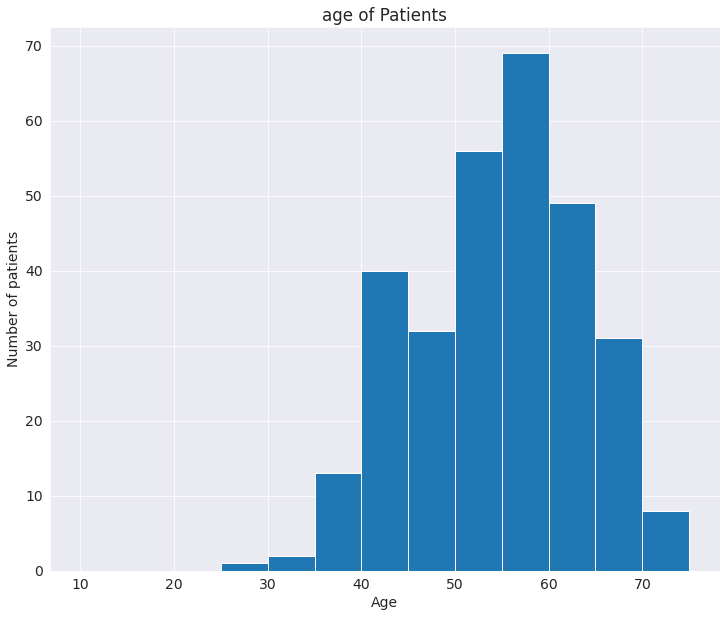

In [17]:
plt.figure(figsize=(12,10))
plt.title('age of Patients')
plt.xlabel('Age')
plt.ylabel('Number of patients')

plt.hist(mod_df.age, bins=np.arange(10,80,5));

In [18]:
# How many patients are over 50
age_50_df = mod_df[mod_df.age >= 50 ]
below_50_df = mod_df[mod_df.age < 50]
print('There are {} people above the age of 50  and {} people under the age of 50. '.format(age_50_df.shape[0], below_50_df.shape[0]))

There are 215 people above the age of 50  and 88 people under the age of 50. 


We are now looking for the relationship between age and blood pressure.

In [19]:
bins = [25,30,35, 40,45, 50, 55,60,65, 70, 75, 80]
labels = ['25-29', '30-34', '35-39', '40-44', '45-49','50-54','55-59', '60-64','65-69', '70-74','75-80']
mod_df['agerange'] = pd.cut(mod_df.age, bins, labels = labels,include_lowest = True)

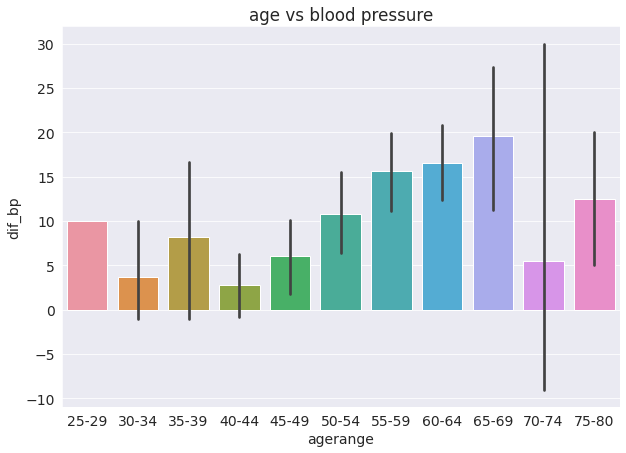

In [20]:
# looking for relationship between age and blood pressure
plt.figure(figsize=(10,7))
plt.xlabel('Age')
plt.ylabel('blood pressure')
plt.title('age vs blood pressure')
sns.barplot(x = mod_df.agerange, y = mod_df.dif_bp,);

We notice that the people between the age of 60 to 70 years old have the highest blood pressure. The age group between 40-44 years have the lowest and the age group between 70-74 years have the widest variability.

There are three different types of chest pains, we will visually analyze the number of patients experiencing each type

In [21]:
cp_counts = mod_df.cp.value_counts()
cp_counts

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

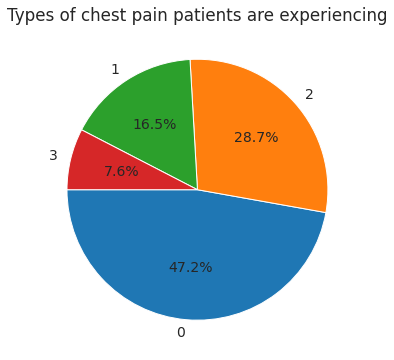

In [22]:
#visualization of how many patients are experiecing the different types of chest pain
plt.figure(figsize=(12,6))
plt.title('Types of chest pain patients are experiencing')
plt.pie(cp_counts, labels=cp_counts.index, autopct='%1.1f%%', startangle=180);

It is noticeable that almost half of the patients are not experiencing any chest pain. It is safe to say, in accordance to these results, that a relation bewteen chest pain and heart disease is highly unlikely.

We're now going to see if there is a reltion in cholestrol levels.

Text(0.5, 1.0, 'Cholestrol levels in patients')

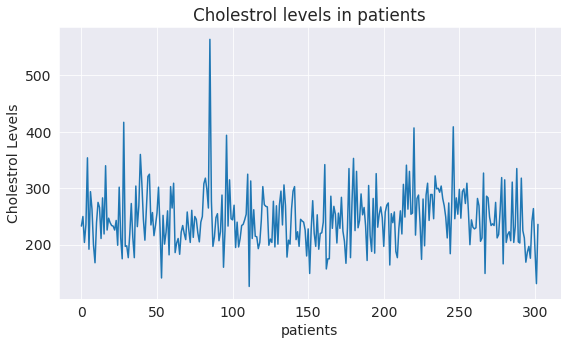

In [23]:
plt.plot(mod_df.chol)

plt.xlabel('patients')
plt.ylabel('Cholestrol Levels')

plt.title("Cholestrol levels in patients")

We can see that most patients have a choletrol level between 200-300 mg, with one patient who's cholestrol level is over 500 mg per deciliter.

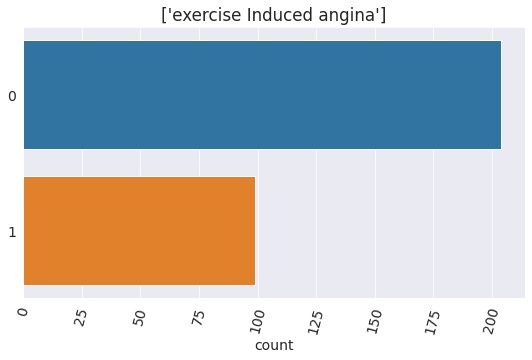

In [24]:
sns.countplot( y=mod_df.exang)
plt.xticks(rotation=75);
plt.title(['exercise Induced angina'])
plt.ylabel(None);

We can see that more than half (50%) the patients experienced exercise induced angina (chest pain).